**SETTING UP THE ENVIRONMENT AND INSTALLING THE DEPENDENCIES**

In [ ]:
#!sudo apt-get update
#!sudo apt-get install python3.8
#python3 --version
#pip3 install numpy
#pip3 install pandas
#pip3 install scipy
#pip install scikit-learn
#pip3 install matplotlib

In [2]:
#install google.colab
#!pip3 install cdsapi
#install scipy  
#pip3 install scipy
#!pip install netCDF4
#install xarray
#!pip3 install xarray
#install other dependencies of these packages too
#install packages on which these packages are dependent open
#!pip3 install scipy
#!pip install netCDF4
#!pip3 install xarray
#!pip3 install sklearn-xarray
#!sudo apt install mlocate
#!sudo updatedb
#!pip install git+https://github.com/rabernat/xbatcher.git

**IMPORTING THE PACKAGES AND LIBRARIES**

In [2]:
import cdsapi
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
from random import *
from sklearn_xarray import wrap
from sklearn_xarray.datasets import load_dummy_dataarray
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import scipy.stats as stats

**UPLOADING THE DATASETS**

In [1]:
#%cd ~
#files.upload()

In [10]:
#!mv apikey .cdsapirc
#%ls -a

./   .bashrc*  .cdsapirc  .gsutil/   .jupyter/  .local/  .profile
../  .cache/   .config/   .ipython/  .keras/    .npm/


In [4]:
"""Downloading the netCDF file for temperature above 2m dataset"""
c = cdsapi.Client()

c.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': '2m_temperature',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
    },
    'download.nc')

2020-12-03 00:11:03,554 INFO Welcome to the CDS
2020-12-03 00:11:03,556 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-03 00:11:03,758 INFO Request is completed
2020-12-03 00:11:03,759 INFO Downloading http://136.156.132.201/cache-compute-0004/cache/data5/adaptor.mars.internal-1606304256.5677047-27540-27-e6f4f9bf-4689-4e0d-980b-5a047795bcce.nc to download.nc (383.4M)
2020-12-03 00:16:58,860 INFO Download rate 1.1M/s    


Result(content_length=402005984,content_type=application/x-netcdf,location=http://136.156.132.201/cache-compute-0004/cache/data5/adaptor.mars.internal-1606304256.5677047-27540-27-e6f4f9bf-4689-4e0d-980b-5a047795bcce.nc)

In [12]:
#%ls -a

./   .bashrc*  .cdsapirc  download.nc  .ipython/  .keras/  .npm/
../  .cache/   .config/   .gsutil/     .jupyter/  .local/  .profile


In [11]:
"""Downloading the netCDF file for total precipitation dataset"""
c2 = cdsapi.Client()

c2.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'total_precipitation',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
    },
    'download2.nc')

2020-12-02 23:55:39,785 INFO Welcome to the CDS
2020-12-02 23:55:39,786 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-02 23:55:39,989 INFO Request is completed
2020-12-02 23:55:39,990 INFO Downloading http://136.156.132.153/cache-compute-0002/cache/data7/adaptor.mars.internal-1606930028.4844875-30998-27-f51a58dc-8996-48b9-98bc-4874706a9493.nc to download2.nc (383.4M)
2020-12-02 23:59:28,271 INFO Download rate 1.7M/s    


Result(content_length=402005984,content_type=application/x-netcdf,location=http://136.156.132.153/cache-compute-0002/cache/data7/adaptor.mars.internal-1606930028.4844875-30998-27-f51a58dc-8996-48b9-98bc-4874706a9493.nc)

In [12]:
"""Downloading the netCDF file for volumetric soil layer 1 dataset"""
c3 = cdsapi.Client()

c3.retrieve(
    'reanalysis-era5-land',
    {
        'format': 'netcdf',
        'variable': 'volumetric_soil_water_layer_1',
        'year': '2019',
        'month': '12',
        'day': [
            '01', '02', '03',
            '04', '05', '06',
            '07', '08', '09',
            '10', '11', '12',
            '13', '14', '15',
            '16', '17', '18',
            '19', '20', '21',
            '22', '23', '24',
            '25', '26', '27',
            '28', '29', '30',
            '31',
        ],
        'time': '12:00',
    },
    'download3.nc')

2020-12-03 00:00:34,501 INFO Welcome to the CDS
2020-12-03 00:00:34,504 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-land
2020-12-03 00:00:34,737 INFO Request is completed
2020-12-03 00:00:34,738 INFO Downloading http://136.156.133.32/cache-compute-0009/cache/data4/adaptor.mars.internal-1606810484.1057675-5577-36-3fbadd9e-1719-4e0f-bf25-54059878c33a.nc to download3.nc (383.4M)
2020-12-03 00:07:26,985 INFO Download rate 952.3K/s  


Result(content_length=402006008,content_type=application/x-netcdf,location=http://136.156.133.32/cache-compute-0009/cache/data4/adaptor.mars.internal-1606810484.1057675-5577-36-3fbadd9e-1719-4e0f-bf25-54059878c33a.nc)

**COLLECTING DATA TO XARRAYS**

In [3]:
ds = xr.open_dataset("download.nc")
ds2 = xr.open_dataset("download2.nc")
ds3 = xr.open_dataset("download3.nc")

In [3]:
ds

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 11:37:48 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [4]:
ds2

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    tp         (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-02 17:27:20 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

In [5]:
ds3

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-12-01 08:14:55 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

**EXPLORATORY DATA ANALYSIS**

In [6]:
ds_dataframe = ds.to_dataframe()
ds_dataframe.describe()

,t2m
count,6.859875e+07
mean,1.252200e+02
std,9.921533e+01
min,2.212852e+02
25%,2.490525e+02
50%,2.640780e+02
75%,2.895455e+02
max,3.177737e+02


statistical analysis

In [18]:
ds2_dataframe = ds2.to_dataframe()
ds2_dataframe.describe()

,tp
count,6.859875e+07
mean,6.402567e-04
std,2.509793e-03
min,7.450581e-09
25%,7.450581e-09
50%,1.670420e-05
75%,2.505183e-04
max,2.188928e-01


In [19]:
ds3_dataframe = ds3.to_dataframe()
ds3_dataframe.describe()

,swvl1
count,6.859875e+07
mean,1.266341e-01
std,1.748465e-01
min,0.000000e+00
25%,1.927027e-01
50%,2.716025e-01
75%,3.529453e-01
max,7.660065e-01


Understading from the statistical analysis:

1. All three datasets have 6.859875e+07 number of data points. So, there is no
need to drop few data points from any of the three datasets before combining.

2. Mean and min value of Air temperature temperature dataset is much higher than other two.
So, the data range must be brought to a common range to ensure that the model gives equal
importance to air temperature and volumetric soil water variables while learning to predict
precipitation.

In [23]:
ds_null = ds.isnull()
ds2_null = ds2.isnull()
ds3_null = ds3.isnull()

Finding the presence of NAN values

In [24]:
ds_null

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) bool True True True ... False False

In [25]:
random_date = "2019-12-" + str(randint(1, 31)) + "T12:00:00.000000000"
ds_dash = ds.sel(time=random_date)
ds2_dash = ds2.sel(time=random_date)
ds3_dash = ds3.sel(time=random_date)

Plotting color map of 2m Air Temperature dataset for a random date

In [26]:
ds_dash

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
    time       datetime64[ns] 2019-12-29T12:00:00
Data variables:
    t2m        (latitude, longitude) float32 nan nan nan ... 246.2 246.2 246.2
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 11:37:48 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

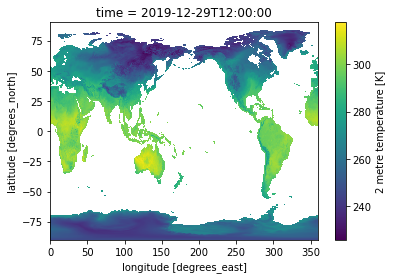

In [27]:
ds_dash.t2m.plot()

From the above plot:

Even for a randomly taken day we observe that 
the range is broad for all the geo spatial location points.
We understand that the distribution is spread out and 

The obvioud fact that the temperature is high at areas closer 
to equator and drops as we go towards the poles is observed.

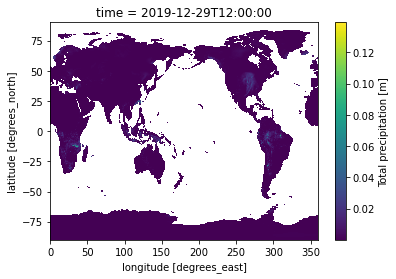

In [28]:
ds2_dash.tp.plot()

Plotting color map of Total precipitation dataset for a random date

From the above plot we notice that there isn't 
much direct dependence of total percipitation on only 
temperature at 2m above surface

We notice that for few geo spatial points range, 
the total precipitation has a steep drop compared to 
rest all geo spatial points.

Rest all areas are strictly in very low range values.
So we can conclude that this dataset is left skewed.

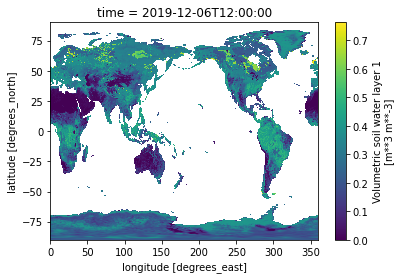

In [28]:
ds3_dash.swvl1.plot()

Plotting color map of Volumetric soil water layer 1 for a random date

From the above plot we notice that there is no 
high noticable dependence of volumetric soil water layer 
on closeness to equitor.

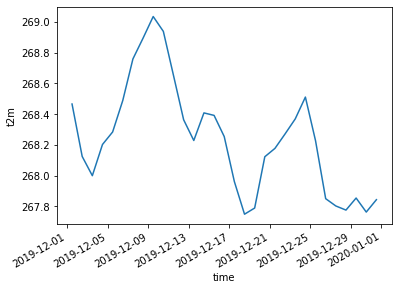

In [29]:
ds.t2m.mean(dim=('longitude', 'latitude')).plot()

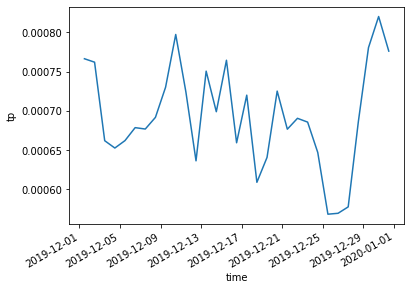

In [30]:
ds2.tp.mean(dim=('longitude', 'latitude')).plot()

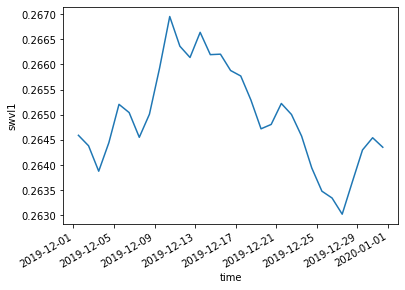

In [31]:
ds3.swvl1.mean(dim=('longitude', 'latitude')).plot()

From the above three plots we see that there is a
strong dependence of the variables on time.

So while developing the model, cosnidering the datetime 
part of dataset alogn with latitude and logitude will help
the model learn better and give better predictions.

Statistical tests like dickey fuller test can be applied 
to check whether the behaviour of this time series is 
stationary and accordingly differencing can be done
to the dataset as a preprocessing step
before applying the model.

(array([  321574.,  3954441., 14419857., 10647769., 10623027.,  6757909.,
         4377244.,  8346348.,  8174480.,   976104.]),
 array([221.28519, 230.93404, 240.58289, 250.23172, 259.88058, 269.52942,
        279.17825, 288.82712, 298.47595, 308.12482, 317.77365],
       dtype=float32),
 <a list of 10 Patch objects>)

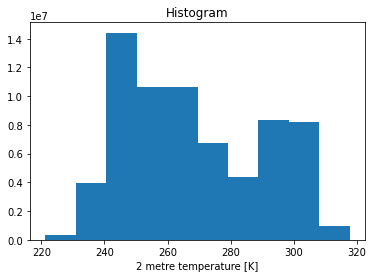

In [32]:
ds.t2m.plot()

Histogram

(array([6.8436371e+07, 1.4117100e+05, 1.5473000e+04, 3.8770000e+03,
        1.1820000e+03, 4.5600000e+02, 1.6200000e+02, 5.2000000e+01,
        7.0000000e+00, 2.0000000e+00]),
 array([7.4505806e-09, 2.1889284e-02, 4.3778561e-02, 6.5667838e-02,
        8.7557115e-02, 1.0944639e-01, 1.3133568e-01, 1.5322495e-01,
        1.7511423e-01, 1.9700350e-01, 2.1889278e-01], dtype=float32),
 <a list of 10 Patch objects>)

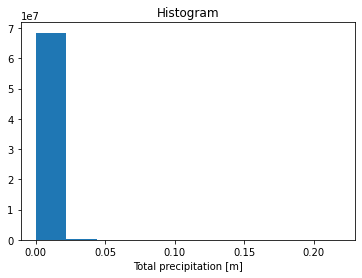

In [33]:
ds2.tp.plot()

(array([ 7662084.,  4145751., 14999080., 12867079., 16728351.,  8844565.,
         2057516.,   700088.,   566021.,    28218.]),
 array([0.        , 0.07660065, 0.1532013 , 0.22980194, 0.3064026 ,
        0.38300323, 0.45960388, 0.5362045 , 0.6128052 , 0.6894058 ,
        0.76600647], dtype=float32),
 <a list of 10 Patch objects>)

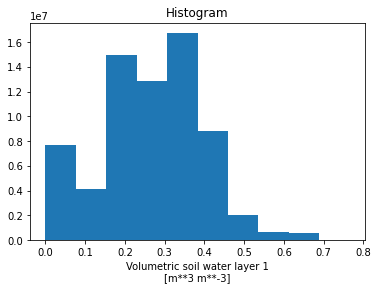

In [34]:
ds3.swvl1.plot()

From the histogram too, we come to the same conclusions we came at 
after visualizing the color maps.

**PREPROCESSING GEOSPATIAL DATA**

In [11]:
def preprocessing_data_Resolution(ds, ds2, ds3):

  """Linear interpolation"""
  dx_new = 0.05

  newlon = np.arange(0.000e+00, 3.6e+02, dx_new)
  newlat = np.arange(-90, 90+dx_new, dx_new)
  newlat_dash = newlat[::-1] 

  ds_interpolated = ds.interp(latitude=newlat_dash, longitude=newlon)
  ds2_interpolated = ds2.interp(latitude=newlat_dash, longitude=newlon)
  ds3_interpolated =ds3.interp(latitude=newlat_dash, longitude=newlon)
 
  return ds_interpolated, ds2_interpolated, ds3_interpolated

To increase spatial resolution 
Increasing the resolution, will help in training the model with more
sensitivity of geo spatial points and to get more accurate predictions
for a specific geo spatial point.

In [15]:
def preprocessing_data_NanValues(ds_interpolated,ds2_interpolated, ds3_interpolated):  
  """Drop Nan values"""  

  ds_interpolated.dropna(dim='longitude', how='all')
  ds2_interpolated.dropna(dim='longitude', how='all')
  ds3_interpolated.dropna(dim='longitude', how='all')

  return ds_interpolated, ds2_interpolated, ds3_interpolated

Dropping the rows containing Null values is chosen instead of interpolating them.
    Since we have sufficiently large data, we can affort to lose some of the rows,
    instead of compromising the accuracy of the dataset by interpolating them.

In [5]:
def preprocessing_data_Transformation(ds2_interpolated):  
    """Tranformation on Total precipitation data"""  

    ds2_interpolated['tp'] = np.log(ds2_interpolated['tp'])
    return ds2_interpolated

Applying log transform on the total precipitation dataset to 
correct the left skewness of the data.

Must remember to apply inverse log to the prediction obtained to get 
actual values

In [6]:
def preprocessing_data_Scaling(ds_interpolated, ds2_interpolated, ds3_interpolated):     
  ds_interpolated_scaled = wrap(MinMaxScaler()).fit_transform(ds_interpolated)
  ds2_interpolated_scaled = wrap(StandardScaler()).fit_transform(ds2_interpolated)
  ds3_interpolated_scaled = wrap(StandardScaler()).fit_transform(ds3_interpolated)
  return ds_interpolated_scaled, ds2_interpolated_scaled, ds3_interpolated_scaled

In [ ]:
#ds_interpolated, ds2_interpolated, ds3_interpolated = preprocessing_data_Resolution(ds, ds2, ds3)

In [17]:
#ds_interpolated, ds2_interpolated, ds3_interpolated = preprocessing_data_NanValues(ds,ds2, ds3)

In [ ]:
#ds2_interpolated = preprocessing_data_Transformation(ds2_interpolated)

In [ ]:
#ds_interpolated_scaled, ds2_interpolated_scaled, ds3_interpolated_scaled = preprocessing_data_Scaling(ds_interpolated, ds2_interpolated, ds3_interpolated)

Unable to executing the above 4 functions becuase of memory 
limitations but removing Nan values, applying transformation and 
min max scaling will be performed later,after we generate
dataframe using the Dataarray and before training the model.

In [9]:
ds_null = ds.isnull()
ds2_null = ds2.isnull()
ds3_null = ds3.isnull()

Finding the presence of NAN values

In [10]:
ds_null

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) bool True True True ... False False

Combining the three Datasets into ds_combine

In [6]:
ds_combine = ds
ds_combine['tp'] = ds2['tp']
ds_combine['swvl1'] = ds3['swvl1']
ds_combine

<xarray.Dataset>
Dimensions:    (latitude: 1801, longitude: 3600, time: 31)
Coordinates:
  * longitude  (longitude) float32 0.0 0.1 0.2 0.3 ... 359.6 359.7 359.8 359.9
  * latitude   (latitude) float32 90.0 89.9 89.8 89.7 ... -89.8 -89.9 -90.0
  * time       (time) datetime64[ns] 2019-12-01T12:00:00 ... 2019-12-31T12:00:00
Data variables:
    t2m        (time, latitude, longitude) float32 ...
    tp         (time, latitude, longitude) float32 ...
    swvl1      (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2020-11-25 11:37:48 GMT by grib_to_netcdf-2.16.0: /opt/ecmw...

**Obtaining the combined data in dataframe**

In [7]:
ds_combine_dataframe = ds_combine.to_dataframe()
ds_combine_dataframe

t2m            tp     swvl1
latitude longitude  time                                                   
 90.0    0.000000   2019-12-01 12:00:00         NaN           NaN       NaN
                    2019-12-02 12:00:00         NaN           NaN       NaN
                    2019-12-03 12:00:00         NaN           NaN       NaN
                    2019-12-04 12:00:00         NaN           NaN       NaN
                    2019-12-05 12:00:00         NaN           NaN       NaN
...                                             ...           ...       ...
-90.0    359.899994 2019-12-27 12:00:00  246.587769  8.350611e-05  0.206098
                    2019-12-28 12:00:00  249.062820  1.202524e-04  0.206098
                    2019-12-29 12:00:00  246.191711  7.450581e-09  0.206098
                    2019-12-30 12:00:00  247.661133  1.336634e-05  0.206098
                    2019-12-31 12:00:00  243.946350  7.450581e-09  0.206098

[200991600 rows x 3 columns]

**Serializing the data and generating pickle and NetCDF files**

In [8]:
ds_combine_dataframe.to_pickle("./wikilimoData.pkl")

In [10]:
ds_combine.to_netcdf("./wikilimoXArrayData.nc")

Next Step:

Deserialize the wikilimoData.pkl and apply Deep learning model to
predict the total precipitation.

To be done in DNN_model.ipynb file